# Databehandling

Programmering gjør oss i stand til å behandle og analysere store mengder data som er umulig eller svært tidkrevende å behandle for hånd. Det jobbes også stadig med å utvikle gode biblioteker for statistisk analyse i Python, noe som gjør Python til et svært populært verktøy for nettopp dette. Vi skal se på bibliotekene Pandas og Seaborn, og utforske hvordan vi kan bruke disse til å lese og analysere datafiler.



## Pandas
I Pandas (og for så vidt mange andre statistiske verktøy) kalles et datasett ofte for _dataframe_/_dataramme_ (df). Ved å bruke Pandas er det en del underliggende kode vi ikke ser, men dette gjør igjen at vi får gjort mer på en enklere måte. Vi starter med et eksempel:


In [3]:
import pandas as pd
import pylab as pl
import seaborn as sns

fil = pd.read_csv("Datafiler/cereal.csv", delimiter = ";")

Vi ser at vi her får ut en tabell over ulike frokostblandinger og næringsinnholdet i disse. Hvis fila di ligger i en annen mappe en programmet ditt, må du spesifisere dette under filnavnet, f.eks. som 'programmering\bilder\cereal.csv'. Du kan også laste opp dokumenter fra ei nettside ved å legge inn en nettadresse/url istedenfor filnavnet.

funksjonen read_csv leser såkalte csv-filer, _comma separated values_, som vil si at verdiene er separert med komma eller semikolon. Her er separatoren semikolon, og vi spesifiserer det ved å skrive sep = ";". Dersom separatoren mellom dataene i samme rad hadde vært mellomrom, måtte vi skrevet " " osv.

Det er den del enkle funksjoner en kan bruke på datasettet. Her er tre viktige funksjoner:

In [4]:
# Skriver ut de fem første linjene for kontroll (eventuelt x antall linjer gitt som argument)
fil.head()

# Som head(), bare med de siste linjene
fil.tail()

# Gir litt deskriptiv statistikk av datasettet, f.eks. standardavvik, gjennomsnitt og min/maks.
fil.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2809.402597,2259.766234,6.922078,96.077922,28.246753,42.665705
std,19.484119,1.094790,1.006473,83.832295,10722.568094,9653.531444,4.444885,71.286813,22.342523,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,15.000000,7.000000,90.000000,25.000000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,18.000000,11.000000,120.000000,25.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,43283.000000,43233.000000,15.000000,330.000000,100.000000,93.704912


In [15]:
print(fil.keys())

Index(['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'rating'],
      dtype='object')


Vi kan også sortere dataene etter kriterier, f.eks. etter synkende rekkefølge av karbohdyratinnhold, etterfulgt av fettinnhold:

In [24]:
fil.sort_values(by=['carbo', 'fat'], ascending=False)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
51,Oatmeal Raisin Crisp,130,3,2,170,43221,43233,10,120,25,30.450843
36,Honey Nut Cheerios,110,3,1,250,43221,43231,10,90,25,31.072217
5,Apple Cinnamon Cheerios,110,2,2,180,43221,43230,10,70,25,29.509541
59,Raisin Nut Bran,100,3,2,140,43222,43230,8,140,25,39.703400
61,Rice Chex,110,1,0,240,0,23,2,30,25,41.998933
15,Corn Chex,110,2,0,280,0,22,3,25,25,41.445019
62,Rice Krispies,110,2,0,290,0,22,3,35,25,40.560159
49,Nutri-Grain Almond-Raisin,140,3,2,220,3,21,7,130,25,40.692320
40,Kix,110,2,1,260,0,21,3,40,25,39.241114
69,Total Corn Flakes,110,2,1,200,0,21,3,35,100,38.839746


Vi kan ekstrahere utvalg, f.eks. kan vi redusere datasettet vårt til 20 elementer. Vi kan nå importere et større datasett med reelle verdier (du har kanskje sett at noen av frokostblandingsverdiene ikke er helt riktige?). Mattilsynet har en stor oversikt over matvarer på matvaretabellen.no, så la oss importere disse dataene og ekstrahere noen elementer som vi plotter.

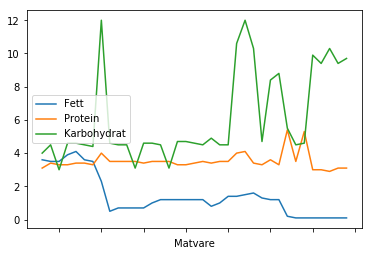

In [56]:
df = pd.read_excel('http://www.matportalen.no/verktoy/matvaretabellen/article43467.ece/BINARY/Matvaretabellen%202018%20(xlsx)', skiprows=[0,1,3])

utvalg = df.iloc[0:40]
utvalg.set_index('Matvare')[['Fett', 'Protein','Karbohydrat']].plot()

Vi ser her fordelinga av fett, protein og karbohydrat i de 40 første første matvarene (iloc[0:40]). Merk at tabellen inneholder rader som vi ikke ønsker, og vi har brukt argumentet skiprows med ei liste over radene vi ønsker å se bort fra. Merk også at vi her bruker read_excel istedenfor read_csv.

Legg merke til at plottinga her er litt eksotisk. En kunne brukt utvalg.plot(x = 'Matvare', y = <verdier en ønsker å sjekke>), men y tar egentlig kun én verdi her, ikke en liste. Det går fint å plotte, men du får en feilmelding. Her er metoden hvis du ønsker å bare plotte én verdi:

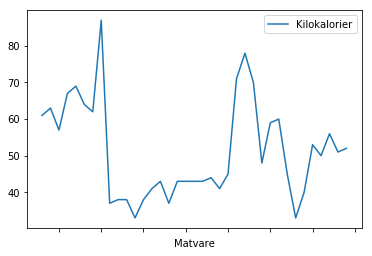

In [57]:
utvalg.plot(x = 'Matvare', y = 'Kilokalorier')

In [13]:
data = {'Navn': ["Tone", "Cathrine", "Victoria", "Andreas"],
        'Sted' : ["Oslo", "Bærum", "Oslo", "London"],
        'Alder' : [24, 13.5, 33, 32]
       }

data_pandas = pd.DataFrame(data)
#display(data_pandas)
display(data_pandas[data_pandas.Alder > 30])

NameError: name 'Alder' is not defined

In [12]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========